<h2>Multi-layer Perception với bộ dữ liệu Fashion-Mnist</h2h2>

<h4>Load dữ liệu và biến đổi dữ liệu</h4>

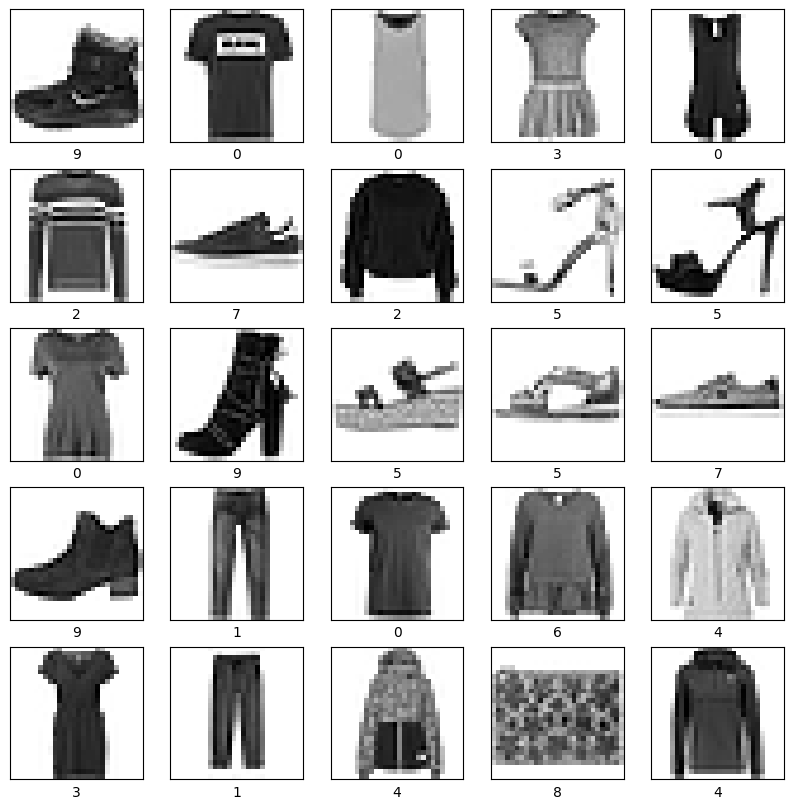

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dữ liệu Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, val_images = train_images[:50000], train_images[50000:]
train_labels, val_labels = train_labels[:50000], train_labels[50000:]

# Chuẩn hóa dữ liệu (Normalization)
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# In ra hình ảnh mẫu và nhãn
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


<h4>Xây dựng mô hình</h4>

In [15]:
from tensorflow.keras import initializers
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))

# Sử dụng He Weight Initialization cho các lớp Dense
he_initializer = initializers.HeNormal()

model.add(layers.Dense(256, activation='relu', kernel_initializer=he_initializer))
model.add(layers.Dense(128, activation='relu', kernel_initializer=he_initializer))
model.add(layers.Dense(256, activation='relu', kernel_initializer=he_initializer))
model.add(layers.Dense(64, activation='relu', kernel_initializer=he_initializer))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Tóm tắt mô hình
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 256)               33024     
                                                                 
 dense_23 (Dense)            (None, 64)                16448     
                                                                 
 dense_24 (Dense)            (None, 10)                650       
                                                                 
Total params: 283978 (1.08 MB)
Trainable params: 28397

<h4>Huấn luyện mô hình</h4>

In [16]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 19s 11ms/step - loss: 0.5048 - accuracy: 0.8174 - val_loss: 0.4031 - val_accuracy: 0.8535
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3805 - accuracy: 0.8597 - val_loss: 0.3698 - val_accuracy: 0.8695
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3432 - accuracy: 0.8742 - val_loss: 0.3446 - val_accuracy: 0.8753
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3188 - accuracy: 0.8830 - val_loss: 0.3326 - val_accuracy: 0.8810
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3000 - accuracy: 0.8882 - val_loss: 0.3376 - val_accuracy: 0.8801
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.2875 - accuracy: 0.8921 - val_loss: 0.3419 - val_accuracy: 0.8838
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2724 - accuracy: 0.8971 - val_loss: 0.3626 -

<h4>Đánh giá mô hình</h4>

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3508 - accuracy: 0.8809 - 1s/epoch - 4ms/step

Test accuracy: 0.8809000253677368


<h4>Trực quan hóa kết quả huấn luyện</h4>

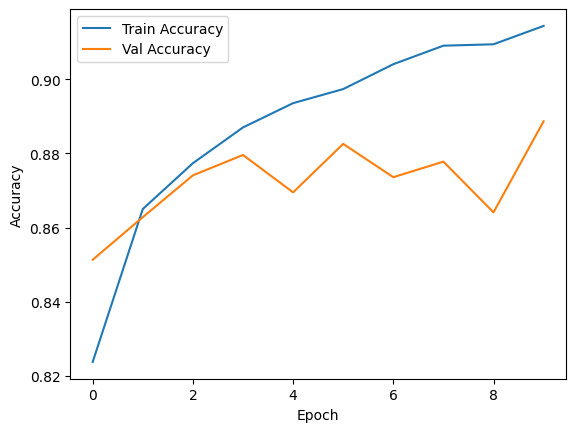

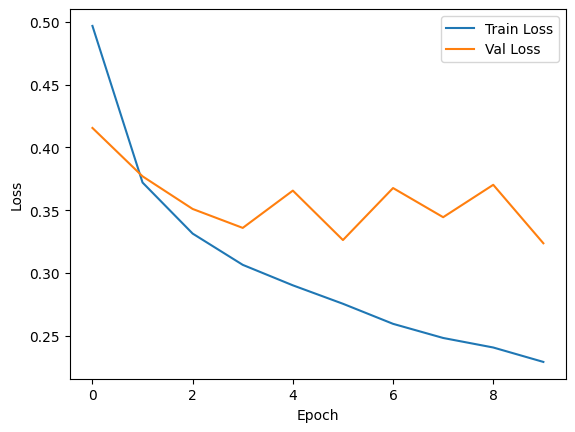

In [11]:
# Đồ thị chính xác huấn luyện và kiểm tra
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Đồ thị mất mát huấn luyện và kiểm tra
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()